In [1]:
import pandas as pd

In [2]:
# Load our Pkgs
from pyspark import SparkContext

In [3]:
sc = SparkContext(master='local[2]')

In [4]:
# Spark UI
sc

<SparkContext master=local[2] appName=pyspark-shell>

In [5]:
# # Load Pkgs 
from pyspark.sql import SparkSession

In [6]:
# Spark
spark = SparkSession.builder.appName("MLwithSpark").getOrCreate()

In [7]:
# Load our dataset
df = spark.read.csv("HVC_telecom_cleaned.csv",header=True,inferSchema=True)

In [8]:
# Preview Dataset
df.show(vertical=True)

-RECORD 0----------------------------
 id                       | 0        
 arpu_8                   | 213.803  
 onnet_mou_8              | 0.0      
 offnet_mou_8             | 0.0      
 roam_ic_mou_8            | 0.0      
 roam_og_mou_8            | 0.0      
 loc_og_t2t_mou_8         | 0.0      
 loc_og_t2m_mou_8         | 0.0      
 loc_og_t2f_mou_8         | 0.0      
 loc_og_t2c_mou_8         | 0.0      
 loc_og_mou_8             | 0.0      
 std_og_t2t_mou_8         | 0.0      
 std_og_t2m_mou_8         | 0.0      
 std_og_t2f_mou_8         | 0.0      
 std_og_mou_8             | 0.0      
 isd_og_mou_8             | 0.0      
 spl_og_mou_8             | 0.0      
 og_others_8              | 0.0      
 total_og_mou_8           | 0.0      
 loc_ic_t2t_mou_8         | 0.16     
 loc_ic_t2m_mou_8         | 4.13     
 loc_ic_t2f_mou_8         | 1.15     
 loc_ic_mou_8             | 5.44     
 std_ic_t2t_mou_8         | 0.0      
 std_ic_t2m_mou_8         | 0.0      
 std_ic_t2f_

In [9]:
pandas_df=df.toPandas()
print(pandas_df)

          id    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
0          0   213.803         0.00          0.00           0.00   
1          7  3171.480        52.29        325.91          31.64   
2          9   170.231        22.43         78.34           0.00   
3         13   593.260       534.24        482.46          72.11   
4         16   187.894        70.61        162.76           0.00   
...      ...       ...          ...           ...            ...   
29591  99985     3.447        22.09         21.81           0.00   
29592  99986   564.334       775.41        595.44           0.00   
29593  99989   141.253        28.84        145.81           0.00   
29594  99997   606.817         0.00          0.00           0.00   
29595  99998     0.000         0.00          0.00           0.00   

       roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
1              38.06       

C:\Users\Dell\anaconda3\lib\site-packages\pyspark\sql\pandas\conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
C:\Users\Dell\anaconda3\lib\site-packages\pyspark\sql\pandas\conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
C:\Users\Dell\anaconda3\lib\site-packages\pyspark\sql\pandas\conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

In [10]:
# check for columns
print(df.columns)

['id', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'Churn', 'last_rech_day_8', 'av_arpu_good', 'av_onnet_mou_good', 'av_offnet_mou_good', 'av_

In [11]:
# Check for datatypes
df.dtypes

[('id', 'int'),
 ('arpu_8', 'double'),
 ('onnet_mou_8', 'double'),
 ('offnet_mou_8', 'double'),
 ('roam_ic_mou_8', 'double'),
 ('roam_og_mou_8', 'double'),
 ('loc_og_t2t_mou_8', 'double'),
 ('loc_og_t2m_mou_8', 'double'),
 ('loc_og_t2f_mou_8', 'double'),
 ('loc_og_t2c_mou_8', 'double'),
 ('loc_og_mou_8', 'double'),
 ('std_og_t2t_mou_8', 'double'),
 ('std_og_t2m_mou_8', 'double'),
 ('std_og_t2f_mou_8', 'double'),
 ('std_og_mou_8', 'double'),
 ('isd_og_mou_8', 'double'),
 ('spl_og_mou_8', 'double'),
 ('og_others_8', 'double'),
 ('total_og_mou_8', 'double'),
 ('loc_ic_t2t_mou_8', 'double'),
 ('loc_ic_t2m_mou_8', 'double'),
 ('loc_ic_t2f_mou_8', 'double'),
 ('loc_ic_mou_8', 'double'),
 ('std_ic_t2t_mou_8', 'double'),
 ('std_ic_t2m_mou_8', 'double'),
 ('std_ic_t2f_mou_8', 'double'),
 ('std_ic_mou_8', 'double'),
 ('total_ic_mou_8', 'double'),
 ('spl_ic_mou_8', 'double'),
 ('isd_ic_mou_8', 'double'),
 ('ic_others_8', 'double'),
 ('total_rech_num_8', 'int'),
 ('total_rech_amt_8', 'int'),
 ('ma

In [12]:
# Check for the Schema
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- arpu_8: double (nullable = true)
 |-- onnet_mou_8: double (nullable = true)
 |-- offnet_mou_8: double (nullable = true)
 |-- roam_ic_mou_8: double (nullable = true)
 |-- roam_og_mou_8: double (nullable = true)
 |-- loc_og_t2t_mou_8: double (nullable = true)
 |-- loc_og_t2m_mou_8: double (nullable = true)
 |-- loc_og_t2f_mou_8: double (nullable = true)
 |-- loc_og_t2c_mou_8: double (nullable = true)
 |-- loc_og_mou_8: double (nullable = true)
 |-- std_og_t2t_mou_8: double (nullable = true)
 |-- std_og_t2m_mou_8: double (nullable = true)
 |-- std_og_t2f_mou_8: double (nullable = true)
 |-- std_og_mou_8: double (nullable = true)
 |-- isd_og_mou_8: double (nullable = true)
 |-- spl_og_mou_8: double (nullable = true)
 |-- og_others_8: double (nullable = true)
 |-- total_og_mou_8: double (nullable = true)
 |-- loc_ic_t2t_mou_8: double (nullable = true)
 |-- loc_ic_t2m_mou_8: double (nullable = true)
 |-- loc_ic_t2f_mou_8: double (nullable = true)


In [13]:
# get number of rows and columns
print("Number of rows: {}".format(df.count()))
print("Number of columns: {}".format(len(df.columns)))


Number of rows: 29596
Number of columns: 105


In [14]:
# import sql function pyspark
import pyspark.sql.functions
from pyspark.sql.functions import isnan, when, count, col

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show(vertical=True)

-RECORD 0-----------------------
 id                       | 0   
 arpu_8                   | 0   
 onnet_mou_8              | 0   
 offnet_mou_8             | 0   
 roam_ic_mou_8            | 0   
 roam_og_mou_8            | 0   
 loc_og_t2t_mou_8         | 0   
 loc_og_t2m_mou_8         | 0   
 loc_og_t2f_mou_8         | 0   
 loc_og_t2c_mou_8         | 0   
 loc_og_mou_8             | 0   
 std_og_t2t_mou_8         | 0   
 std_og_t2m_mou_8         | 0   
 std_og_t2f_mou_8         | 0   
 std_og_mou_8             | 0   
 isd_og_mou_8             | 0   
 spl_og_mou_8             | 0   
 og_others_8              | 0   
 total_og_mou_8           | 0   
 loc_ic_t2t_mou_8         | 0   
 loc_ic_t2m_mou_8         | 0   
 loc_ic_t2f_mou_8         | 0   
 loc_ic_mou_8             | 0   
 std_ic_t2t_mou_8         | 0   
 std_ic_t2m_mou_8         | 0   
 std_ic_t2f_mou_8         | 0   
 std_ic_mou_8             | 0   
 total_ic_mou_8           | 0   
 spl_ic_mou_8             | 0   
 isd_ic_mo

In [15]:
# dropping id column as we dont need it for the ananlysis
drop_col = ['id']
df = df.select([column for column in df.columns if column not in drop_col])

In [16]:
df.describe().toPandas().transpose()

C:\Users\Dell\anaconda3\lib\site-packages\pyspark\sql\pandas\conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
C:\Users\Dell\anaconda3\lib\site-packages\pyspark\sql\pandas\conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
C:\Users\Dell\anaconda3\lib\site-packages\pyspark\sql\pandas\conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

,0,1,2,3,4
summary,count,mean,stddev,min,max
arpu_8,29596,440.4653031490737,492.3139373576523,-945.808,33543.624
onnet_mou_8,29596,196.50482362481077,405.3400292147617,0.0,10752.56
offnet_mou_8,29596,300.6469090417647,439.38521724737564,0.0,14007.34
roam_ic_mou_8,29596,12.083948168671396,66.50311630189242,0.0,2663.11
...,...,...,...,...,...
av_sachet_2g_good,29596,0.14295850790647385,0.5053069454045641,0.0,10.5
av_monthly_3g_good,29596,0.1813927557778078,0.5030551361752831,0.0,11.5
av_sachet_3g_good,29596,0.058943776185971075,0.3262944555402219,0.0,11.0
av_fb_user_good,29596,0.30742330044600624,0.4263915275690086,0.0,1.0


In [17]:
df.groupBy('Churn').count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|    1| 2593|
|    0|27003|
+-----+-----+



C:\Users\Dell\anaconda3\lib\site-packages\pyspark\sql\pandas\conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
C:\Users\Dell\anaconda3\lib\site-packages\pyspark\sql\pandas\conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
C:\Users\Dell\anaconda3\lib\site-packages\pyspark\sql\pandas\conversion.py:202: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

29596


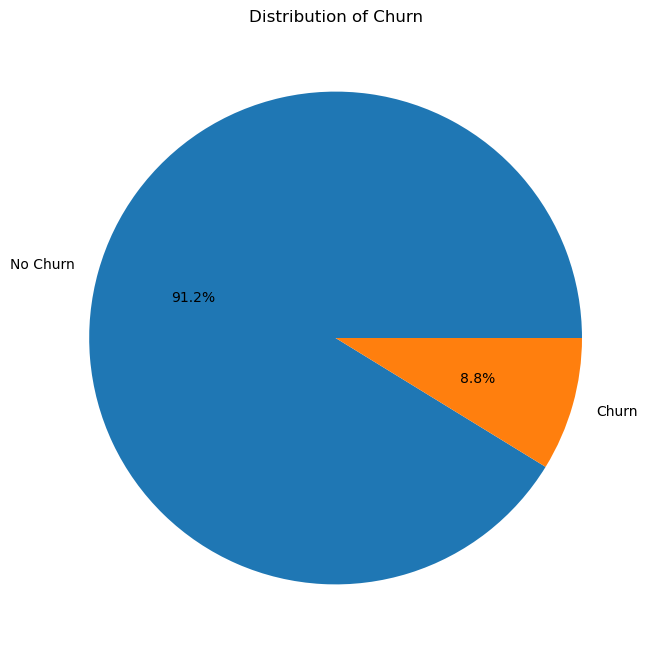

In [18]:
# let's have a look at the distribution of our target variable:
# to make it look better, we first convert our spark df to a Pandas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_pd = df.toPandas()
print(len(df_pd))
plt.figure(figsize=(10,8))
plt.pie(df_pd['Churn'].value_counts(), labels=['No Churn', 'Churn'], autopct='%1.1f%%')
plt.title('Distribution of Churn')
plt.show()

In [19]:
# let's see how everything look in Pandas
import pandas as pd
pd.DataFrame(df.take(10), columns= df.columns)

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,av_vol_3g_mb_good,av_arpu_3g_good,av_arpu_2g_good,av_night_pck_user_good,av_monthly_2g_good,av_sachet_2g_good,av_monthly_3g_good,av_sachet_3g_good,av_fb_user_good,av_last_rech_day_good
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,117.165,212.170,212.170,0.0,0.0,0.0,1.0,0.0,1.0,12.0
1,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,4.5
2,170.231,22.43,78.34,0.00,0.00,22.43,34.93,0.00,0.00,57.36,...,0.000,0.000,0.000,0.0,0.5,0.0,0.0,0.0,0.5,4.5
3,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,9.5
4,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,326.920,13.61,9.46,0.00,0.00,13.61,9.46,0.00,0.00,23.08,...,106.050,0.330,12.205,0.0,1.0,0.0,0.0,0.0,1.0,4.5
6,364.251,71.18,132.51,0.00,0.00,71.18,81.94,10.08,0.00,163.21,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,18.5
7,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,19.5
8,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,...,299.545,153.285,150.890,0.0,0.0,0.0,1.0,0.0,0.5,18.0
9,354.793,141.11,283.36,13.83,22.93,2.48,72.03,20.83,3.15,95.34,...,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,10.5


In [20]:
# Importing necessary libraries
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler

In [21]:
# dropping id column as we dont need it for the ananlysis
drop_col = ['Churn']
input_data= df.select([column for column in df.columns if column not in drop_col])

In [22]:
# Create a vector assembler to combine features into a single vector column
assembler = VectorAssembler(inputCols=input_data.columns, outputCol='features')
assembled_data = assembler.transform(df)

# Applying scaling on the data using StandardScaler

scaler = StandardScaler(inputCol='features', outputCol='scaled_features', withMean=True, withStd=True)
scaled_data = scaler.fit(assembled_data).transform(assembled_data)


In [23]:
from pyspark.ml.stat import Correlation
# Compute the correlation matrix
corr_matrix = Correlation.corr(assembled_data, "features")

# Extract the correlation values from the matrix
corr_values = corr_matrix.collect()[0]["pearson({})".format("features")].toArray()

C:\Users\Dell\anaconda3\lib\site-packages\pyspark\sql\context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [24]:
# Set the correlation threshold
corr_threshold = 0.7

# Find the highly correlated features
corr_pairs = []
for i in range(len(input_data.columns)):
    for j in range(i+1, len(input_data.columns)):
        if corr_values[i][j] > corr_threshold:
            corr_pairs.append((input_data[i], input_data[j], corr_values[i][j]))

# Print the highly correlated features
for pair in corr_pairs:
    print("{} and {}: {}".format(pair[0], pair[1], pair[2]))


Column<'arpu_8'> and Column<'total_rech_amt_8'>: 0.9463550784580889
Column<'arpu_8'> and Column<'av_arpu_good'>: 0.784544300769732
Column<'arpu_8'> and Column<'av_total_rech_amt_good'>: 0.7922995378365797
Column<'onnet_mou_8'> and Column<'std_og_t2t_mou_8'>: 0.8528620192111946
Column<'onnet_mou_8'> and Column<'total_og_mou_8'>: 0.7337571425758102
Column<'onnet_mou_8'> and Column<'av_onnet_mou_good'>: 0.7813720046354079
Column<'offnet_mou_8'> and Column<'std_og_t2m_mou_8'>: 0.8413975275439878
Column<'offnet_mou_8'> and Column<'total_og_mou_8'>: 0.7729633545802517
Column<'offnet_mou_8'> and Column<'av_offnet_mou_good'>: 0.7370856161315633
Column<'loc_og_t2t_mou_8'> and Column<'loc_og_mou_8'>: 0.7668165852594657
Column<'loc_og_t2t_mou_8'> and Column<'av_loc_og_t2t_mou_good'>: 0.8174243992136568
Column<'loc_og_t2m_mou_8'> and Column<'loc_og_mou_8'>: 0.8038732412188634
Column<'loc_og_t2m_mou_8'> and Column<'av_loc_og_t2m_mou_good'>: 0.812517807779505
Column<'loc_og_t2f_mou_8'> and Column<'a

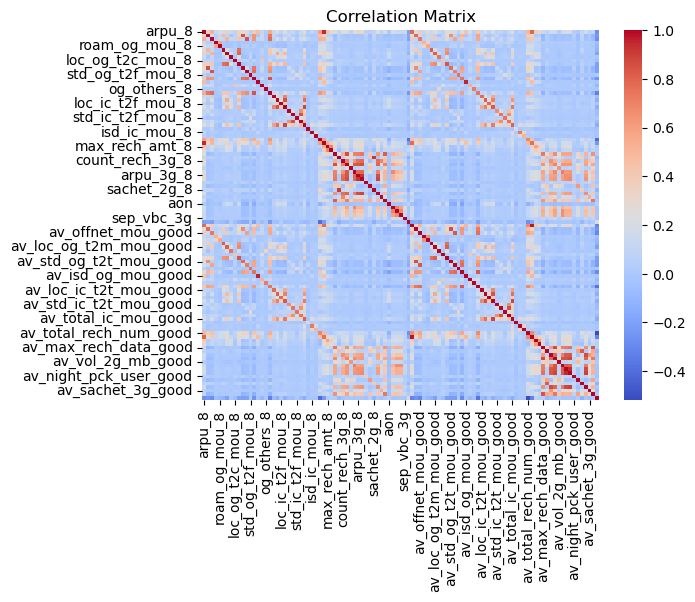

In [25]:
# Convert the correlation matrix to a DataFrame
corr_df = pd.DataFrame(corr_values, columns=input_data.columns, index=input_data.columns)

# Create a heatmap
sns.heatmap(corr_df, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [27]:
from pyspark.ml import Pipeline


pipeline = Pipeline(stages=[assembler,scaler])

model = pipeline.fit(df)

df= model.transform(df)



In [28]:
selectedCols = ['features','Churn']
df = df.select(selectedCols)
df.printSchema()

root
 |-- features: vector (nullable = true)
 |-- Churn: integer (nullable = true)



In [29]:
df.show(5)

+--------------------+-----+
|            features|Churn|
+--------------------+-----+
|(103,[0,18,19,20,...|    1|
|[3171.48,52.29,32...|    1|
|(103,[0,1,2,5,6,9...|    0|
|[593.26,534.24,48...|    0|
|(103,[0,1,2,5,6,7...|    0|
+--------------------+-----+
only showing top 5 rows



In [30]:
# Splitting the data into training and testing datasets
train_data, test_data = df.randomSplit([0.7, 0.3], seed=100)

# Check the number of records in each dataset
print("Number of records in training data:", train_data.count())
print("Number of records in test data:", test_data.count())


Number of records in training data: 20682
Number of records in test data: 8914


In [31]:
train_data.describe().show()

+-------+-------------------+
|summary|              Churn|
+-------+-------------------+
|  count|              20682|
|   mean|0.08708055313799438|
| stddev| 0.2819598808197369|
|    min|                  0|
|    max|                  1|
+-------+-------------------+



In [32]:
test_data.describe().show()

+-------+-------------------+
|summary|              Churn|
+-------+-------------------+
|  count|               8914|
|   mean|0.08884900157056316|
| stddev| 0.2845416301260327|
|    min|                  0|
|    max|                  1|
+-------+-------------------+



In [33]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol = 'features', labelCol = 'Churn', maxIter=10)
lrModel = lr.fit(train_data)


In [34]:
trainingSummary = lrModel.summary

In [35]:
trainingSummary.accuracy

0.9247171453437772

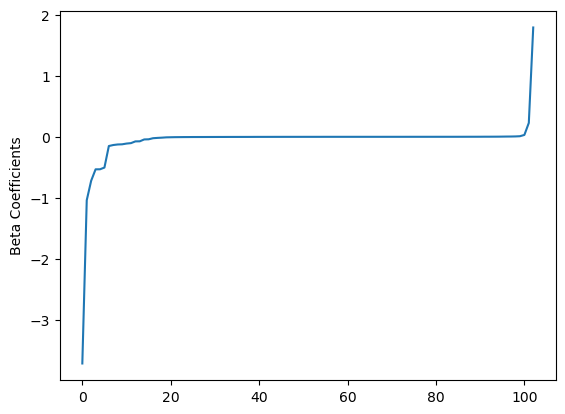

In [36]:
import matplotlib.pyplot as plt
import numpy as np

beta = np.sort(lrModel.coefficients)

plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\pyspark\sql\context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


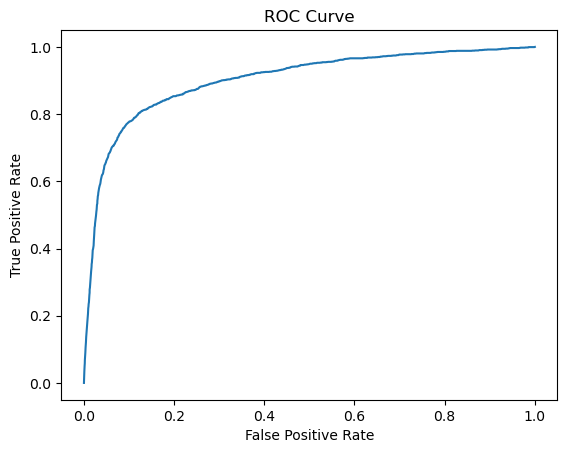

Training set areaUnderROC: 0.9016177213954755


In [37]:
trainingSummary = lrModel.summary

roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [38]:
trainingSummary.areaUnderROC

0.9016177213954755

In [39]:
print(trainingSummary.precisionByLabel)

[0.9332299689906972, 0.6773255813953488]


In [40]:
print(trainingSummary.recallByLabel)

[0.9882421481913034, 0.25874514158800666]


C:\Users\Dell\anaconda3\lib\site-packages\pyspark\sql\context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


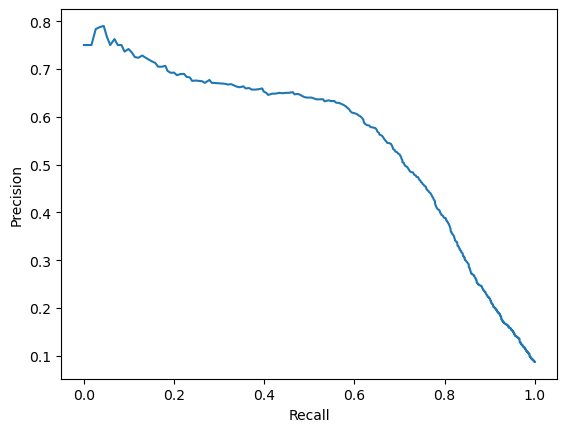

In [41]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\pyspark\sql\context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


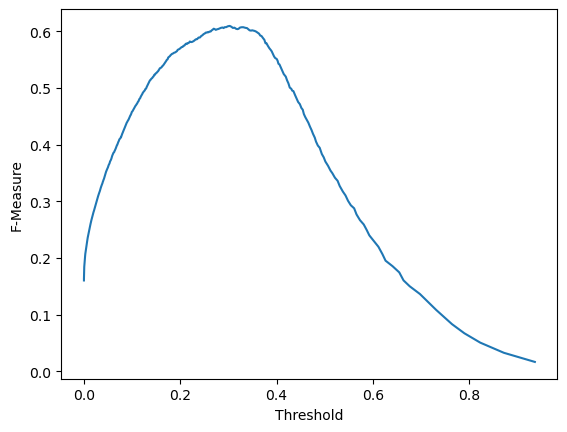

In [42]:
f = trainingSummary.fMeasureByThreshold.toPandas()
plt.plot(f['threshold'],f['F-Measure'])
plt.ylabel('F-Measure')
plt.xlabel('Threshold')
plt.show()


In [43]:
predictions = lrModel.transform(test_data)
predictions.select('Churn', 'prediction','rawPrediction', 'probability').show()

+-----+----------+--------------------+--------------------+
|Churn|prediction|       rawPrediction|         probability|
+-----+----------+--------------------+--------------------+
|    1|       0.0|[0.27042432600693...|[0.56719707341437...|
|    0|       0.0|[4.61705574918068...|[0.99021484747796...|
|    0|       0.0|[5.65571047195888...|[0.99651470244685...|
|    0|       0.0|[4.76922663859963...|[0.99158448091943...|
|    0|       0.0|[5.15392634243830...|[0.99425649943685...|
|    0|       0.0|[3.58621539954807...|[0.97304379028230...|
|    1|       0.0|[5.11183123178858...|[0.99401104412491...|
|    0|       0.0|[2.14665634762935...|[0.89535591158662...|
|    0|       0.0|[2.22662012212663...|[0.90261466693289...|
|    0|       0.0|[3.27935397798416...|[0.96371369925692...|
|    0|       0.0|[5.63956925768823...|[0.99645818990003...|
|    0|       0.0|[4.73932253367862...|[0.99133123626703...|
|    0|       0.0|[2.29250940248895...|[0.90825476800228...|
|    1|       0.0|[3.191

### Logistic Regression on Test Data

In [44]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

predictions_LR = lrModel.transform(test_data)
evaluator = BinaryClassificationEvaluator(labelCol='Churn')
print("Test SET ROC: " + str(evaluator.evaluate(predictions_LR, {evaluator.metricName: "areaUnderROC"})))


Test SET ROC: 0.8996362915040584


# Tuning the model with the ParamGridBuilder and the CrossValidator.

In [45]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10])
             .build())

cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

cvModel = cv.fit(train_data)
predictions = cvModel.transform(test_data)
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.897227321230029


## Decision Tree Classifier
#### Decision trees are widely used since they are easy to interpret, handle categorical features, extend to the multiclass classification setting, do not require feature scaling, and are able to capture non-linearities and feature interactions.

In [46]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Churn', maxDepth = 3)
dtModel = dt.fit(train_data)
dt_predictions = dtModel.transform(test_data)
print(dt_predictions)


DataFrame[features: vector, Churn: int, rawPrediction: vector, probability: vector, prediction: double]


In [47]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Evaluate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol='Churn', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(dt_predictions)

print('Accuracy:', accuracy)


Accuracy: 0.9468252187570114


In [48]:
dt_predictions.select('Churn', 'prediction').show(50)

+-----+----------+
|Churn|prediction|
+-----+----------+
|    1|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    1|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    1|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    1|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    1|       0.0|
|    0|       0.0|
|    0|     

### Gradient Boosting

In [49]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(featuresCol = 'features', labelCol = 'Churn',maxIter=15)
GBT_Model = gbt.fit(train_data)
gbt_predictions = GBT_Model.transform(test_data)
evaluator = BinaryClassificationEvaluator()

In [50]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol='Churn')
auc = evaluator.evaluate(gbt_predictions)

print('AUC:', auc)


AUC: 0.9356563511251401


In [51]:
gbt_predictions.select('Churn', 'prediction').show()

+-----+----------+
|Churn|prediction|
+-----+----------+
|    1|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    1|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    1|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
+-----+----------+
only showing top 20 rows



# Confusion Matrix

In [52]:
import pandas as pd
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# make predictions on the test data using the trained logistic regression model
predictions = lrModel.transform(test_data)

# create a Pandas DataFrame from the predicted labels and true labels
pred_and_labels = predictions.select("prediction", "Churn").toPandas()

# create a confusion matrix using the Pandas crosstab function
confusion_matrix = pd.crosstab(pred_and_labels['Churn'], pred_and_labels['prediction'], rownames=['True'], colnames=['Predicted'])

# print the confusion matrix
print(confusion_matrix)


Predicted   0.0  1.0
True                
0          8032   90
1           585  207


<AxesSubplot:xlabel='Predicted', ylabel='True'>

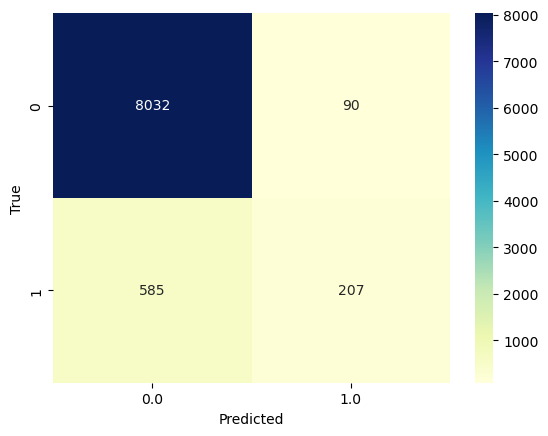

In [58]:
import pandas as pd
import seaborn as sns
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# make predictions on the test data using the trained logistic regression model
predictions = lrModel.transform(test_data)

# create a Pandas DataFrame from the predicted labels and true labels
pred_and_labels = predictions.select("prediction", "Churn").toPandas()

# create a confusion matrix using the Pandas crosstab function
confusion_matrix = pd.crosstab(pred_and_labels['Churn'], pred_and_labels['prediction'], rownames=['True'], colnames=['Predicted'])

# set the color palette
colors = sns.color_palette("Blues")

# visualize the confusion matrix using seaborn heatmap
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='YlGnBu')
